In [ ]:
%cd drive/MyDrive/DataMining/hw3

/content/drive/MyDrive/DataMining/hw3


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt



# <div dir="rtl">a:</div>

<div dir="rtl">

در قسمت اول، ابتدا مجموعه داده خوانده شده است و ستون G1 و G2 حذف شده اند. 

<div>


In [ ]:
df = pd.read_csv('student.csv', sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.drop(['G1', 'G2'], inplace=True, axis=1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,13






# <div dir="rtl">a:</div>

<div dir="rtl">

با توجه به categorical بودن تعدادی از ویژگی ها با استفاده از روش one-hot-encoding و تابع get_dummies این ویژگی ها به ویژگی عددی تبدیل شده اند. 

<div>


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [ ]:
df = pd.get_dummies(df, columns = 
                   ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery', 'higher',
                    'internet', 'romantic'] 
                   )
df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0




<div dir="rtl">

در اینجا متغیر X به عنوان ویژگی های ورودی مدل و متغیر y به عنوان ویژگی هدف تعریف شده است. 

<div>


In [ ]:
c = list(df.columns)
c.remove('G3')
X = df.loc[:, c]
y = df.loc[:, 'G3']




# <div dir="rtl">b:</div>

<div dir="rtl">

در قسمت دوم ابتدا یک estimator از جنس linearregression تعریف شده است. سپس با استفاده از تابع RFECV و estimator ایجاد شده عمل feature selection انجام شده است. 

<div>


In [ ]:
estimator = LinearRegression()

In [ ]:
selector = RFECV(estimator, scoring='neg_mean_squared_log_error')

In [ ]:
selector = selector.fit(X, y)



# <div dir="rtl">b:</div>

<div dir="rtl">

در اینجا با استفاده از دستور n_features تعداد خصوصیات مهم مشخص شده است که برابر 45 است. 


<div>

In [ ]:
selector.n_features_

45


<div dir="rtl">

در این بخش با استفاده از دستور grif_scores_ نمودار scoring برحسب تعداد متغیرها رسم شده است. 

<div>


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


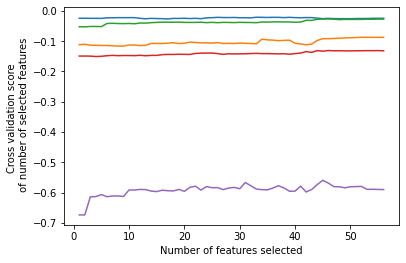

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

<div style="direction:rtl">
a)
در اینجا با استفاده از دستور ranking_ اهمیت ستون ها مشخص شده است. 
<div>

In [ ]:
dict(zip(list(X.columns), list(selector.ranking_)))

{'age': 6,
 'Medu': 11,
 'Fedu': 5,
 'traveltime': 9,
 'studytime': 1,
 'failures': 1,
 'famrel': 3,
 'freetime': 4,
 'goout': 8,
 'Dalc': 1,
 'Walc': 7,
 'health': 2,
 'absences': 10,
 'school_GP': 1,
 'school_MS': 1,
 'sex_F': 1,
 'sex_M': 1,
 'address_R': 1,
 'address_U': 1,
 'famsize_GT3': 1,
 'famsize_LE3': 1,
 'Pstatus_A': 1,
 'Pstatus_T': 1,
 'Mjob_at_home': 1,
 'Mjob_health': 1,
 'Mjob_other': 1,
 'Mjob_services': 1,
 'Mjob_teacher': 1,
 'Fjob_at_home': 1,
 'Fjob_health': 1,
 'Fjob_other': 1,
 'Fjob_services': 1,
 'Fjob_teacher': 1,
 'reason_course': 1,
 'reason_home': 1,
 'reason_other': 1,
 'reason_reputation': 1,
 'guardian_father': 1,
 'guardian_mother': 1,
 'guardian_other': 1,
 'schoolsup_no': 1,
 'schoolsup_yes': 1,
 'famsup_no': 1,
 'famsup_yes': 1,
 'paid_no': 1,
 'paid_yes': 1,
 'activities_no': 1,
 'activities_yes': 1,
 'nursery_no': 1,
 'nursery_yes': 1,
 'higher_no': 1,
 'higher_yes': 1,
 'internet_no': 1,
 'internet_yes': 1,
 'romantic_no': 1,
 'romantic_yes': 1}